In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from pydataset import data
import pandas as pd
import acquire as ac
import env
import prepare as pr
from sklearn.model_selection import train_test_split


### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [3]:
titanic = ac.get_titanic_data()
pr.prep_titanic(titanic)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [4]:
titanic = ac.get_titanic_data()

titanic


dummy_df = pd.get_dummies(titanic[['sex','embarked']], drop_first=True).astype(int)
titanic = pd.concat([titanic, dummy_df], axis=1)

titanic = titanic.drop(columns=['passenger_id', 'sex', 'embarked', 'class', 'deck', 'embark_town'])

titanic['age'] = titanic['age'].fillna(29)


In [5]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   alone       891 non-null    int64  
 7   sex_male    891 non-null    int64  
 8   embarked_Q  891 non-null    int64  
 9   embarked_S  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [7]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [8]:
from prepare import split_titanic_data # for some reason this fuction is working but the other ones are not
train, validate, test = split_titanic_data(titanic)


print(f'train data -> {train.shape}')
print(f'validate data -> {validate.shape}')
print(f'test data -> {test.shape}')

train data -> (498, 10)
validate data -> (214, 10)
test data -> (179, 10)


In [9]:
train.survived.value_counts() # isolated survived because that will be our target variable decided by me 

survived
0    307
1    191
Name: count, dtype: int64

In [10]:
# baseline is that will not survive 
# because more people died than survived

baseline_accuracy = (train['survived'] == 0).mean()
baseline_accuracy

#Baseline Prediction : 0
#Baseline accuracy : 0.616 meaning without doing anything we can accuratly predict someone did not survive 61 percent of the time. 

0.6164658634538153

In [11]:
# SPLIT DATA INTO X AND Y DATA SETS
# this will allow us to separate the target variable and the features 

X_train = train.drop(columns=['survived']) # all the features, will NOT contain the target variable 

X_validate = validate.drop(columns=['survived']) # same as above 

X_test = test.drop(columns=['survived']) # same as above 

y_train = train.survived # will only contain the target variable 

y_validate = validate.survived # same as above 

y_test = test.survived # same as above 

In [12]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
583,1,36.0,0,0,40.1250,1,1,0,0
165,3,9.0,0,2,20.5250,0,1,0,1
50,3,7.0,4,1,39.6875,0,1,0,1
259,2,50.0,0,1,26.0000,0,0,0,1
306,1,29.0,0,0,110.8833,1,0,0,0


In [13]:
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=5)


In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_train)
y_pred[:5]

array([0, 1, 0, 1, 1])

In [16]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[:5]

array([[0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8]])

### Evaluate your results using the model score, confusion matrix, and classification report.



In [17]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [18]:
print(confusion_matrix(y_train, y_pred))


[[257  50]
 [ 53 138]]


In [19]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,257,50
1,53,138


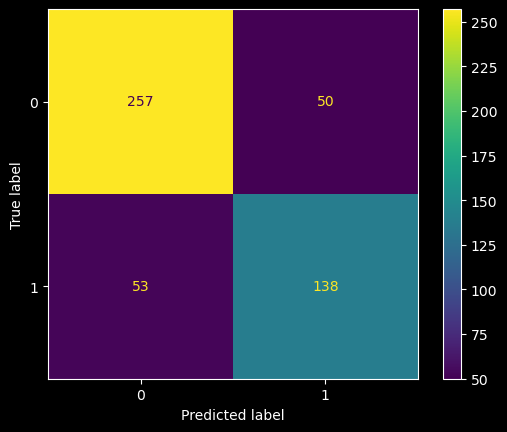

In [20]:
cm = confusion_matrix(y_train, y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)

cm_disp.plot()
plt.show()

In [21]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.84      0.83       307
           1       0.73      0.72      0.73       191

    accuracy                           0.79       498
   macro avg       0.78      0.78      0.78       498
weighted avg       0.79      0.79      0.79       498



### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [22]:
def compute_metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [23]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
print(cm)
print('')
print(f'True Positive -> {TP}')
print(f'True Negative -> {TN}')
print(f'False Positive -> {FP}')
print(f'False Negative -> {FN}')

[[257  50]
 [ 53 138]]

True Positive -> 138
True Negative -> 257
False Positive -> 50
False Negative -> 53


In [24]:
compute_metrics(TN,FP,FN,TP)

Accuracy: 0.7931726907630522

True Positive Rate/Sensitivity/Recall/Power: 0.7225130890052356
False Positive Rate/False Alarm Ratio/Fall-out: 0.16286644951140064
True Negative Rate/Specificity/Selectivity: 0.8371335504885994
False Negative Rate/Miss Rate: 0.2774869109947644

Precision/PPV: 0.7340425531914894
F1 Score: 0.7282321899736148

Support (0): 191
Support (1): 307


### Run through steps 1-3 setting k to 10



In [25]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
y_pred = knn10.predict(X_train)
y_pred[:5]

array([1, 1, 0, 0, 1])

In [27]:
y_pred_proba = knn10.predict_proba(X_train)
y_pred_proba[:5]

array([[0.3, 0.7],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.2, 0.8]])

In [28]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


In [29]:
cm10 = confusion_matrix(y_train, y_pred)
TP = cm10[1, 1]
TN = cm10[0, 0]
FP = cm10[0, 1]
FN = cm10[1, 0]
print(cm10)
print('')
print(f'True Positive -> {TP}')
print(f'True Negative -> {TN}')
print(f'False Positive -> {FP}')
print(f'False Negative -> {FN}')


[[275  32]
 [ 97  94]]

True Positive -> 94
True Negative -> 275
False Positive -> 32
False Negative -> 97


In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       307
           1       0.75      0.49      0.59       191

    accuracy                           0.74       498
   macro avg       0.74      0.69      0.70       498
weighted avg       0.74      0.74      0.73       498



In [31]:
compute_metrics(TN,FP,FN,TP)

Accuracy: 0.7409638554216867

True Positive Rate/Sensitivity/Recall/Power: 0.49214659685863876
False Positive Rate/False Alarm Ratio/Fall-out: 0.10423452768729642
True Negative Rate/Specificity/Selectivity: 0.8957654723127035
False Negative Rate/Miss Rate: 0.5078534031413613

Precision/PPV: 0.746031746031746
F1 Score: 0.5930599369085174

Support (0): 191
Support (1): 307


### Run through steps 1-3 setting k to 20



In [32]:
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [33]:
y_pred = knn20.predict(X_train)
y_pred[:5]

array([0, 1, 0, 0, 1])

In [34]:
y_pred_proba = knn20.predict_proba(X_train)
y_pred_proba[:5]

array([[0.55, 0.45],
       [0.4 , 0.6 ],
       [0.7 , 0.3 ],
       [0.6 , 0.4 ],
       [0.3 , 0.7 ]])

In [35]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn20.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.71


In [36]:
cm20 = confusion_matrix(y_train, y_pred)
TP = cm20[1, 1]
TN = cm20[0, 0]
FP = cm20[0, 1]
FN = cm20[1, 0]
print(cm20)
print('')
print(f'True Positive -> {TP}')
print(f'True Negative -> {TN}')
print(f'False Positive -> {FP}')
print(f'False Negative -> {FN}')


[[269  38]
 [104  87]]

True Positive -> 87
True Negative -> 269
False Positive -> 38
False Negative -> 104


In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       307
           1       0.70      0.46      0.55       191

    accuracy                           0.71       498
   macro avg       0.71      0.67      0.67       498
weighted avg       0.71      0.71      0.70       498



In [38]:
compute_metrics(TN,FP,FN,TP)

Accuracy: 0.714859437751004

True Positive Rate/Sensitivity/Recall/Power: 0.45549738219895286
False Positive Rate/False Alarm Ratio/Fall-out: 0.1237785016286645
True Negative Rate/Specificity/Selectivity: 0.8762214983713354
False Negative Rate/Miss Rate: 0.5445026178010471

Precision/PPV: 0.696
F1 Score: 0.550632911392405

Support (0): 191
Support (1): 307


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [39]:
# setting k to 20 or 10 produced the same results of 79 percent accuracy 

In [40]:
print('Accuracy of KNN (k=5) classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

print('Accuracy of KNN (k=10) classifier on validate set: {:.2f}'
     .format(knn10.score(X_validate, y_validate)))

print('Accuracy of KNN (k=20) classifier on validate set: {:.2f}'
     .format(knn20.score(X_validate, y_validate)))


Accuracy of KNN (k=5) classifier on validate set: 0.71
Accuracy of KNN (k=10) classifier on validate set: 0.72
Accuracy of KNN (k=20) classifier on validate set: 0.71


### Which model performs best on our out-of-sample data from validate?



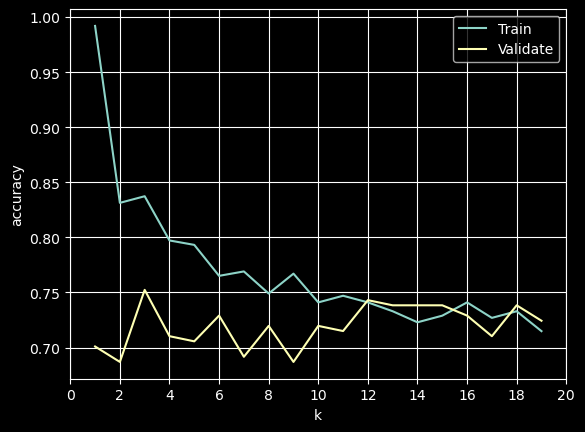

In [41]:
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.grid()
plt.show()